In [1]:
import pickle
with open('/kaggle/input/takeo-original/New_I.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/takeo-original/New_Y.pkl', 'rb') as f:
    Y = pickle.load(f)


In [2]:
import numpy as np
Y = Y.astype(np.float32)

In [3]:
import cv2
import numpy as np
from tensorflow.image import resize

# Supondo que X seja uma lista de imagens coloridas.
X_resized = np.array([resize(image, [100, 100]) for image in X])
#imagens_cinza = np.array([cv2.cvtColor(image.astype('uint8'), cv2.COLOR_BGR2GRAY) for image in X_resized])

'''def converter_para_rgb(imagens_cinza):
    imagens_rgb = np.stack((imagens_cinza,) * 3, axis=-1)
    return imagens_rgb

imagens_rgba = converter_para_rgb(imagens_cinza)



imagens_rgba[0].shape
#X = preprocess_input(imagens_rgba)
'''
X = X_resized
X.shape


# Convertendo a lista em um array NumPy
X = np.array(X)

2024-07-21 20:08:29.746496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 20:08:29.746623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 20:08:29.873240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
print(np.min(X))
print(np.max(X))
X.shape

0.0
255.0


(10022, 100, 100, 3)

In [5]:
from keras.applications.resnet50 import preprocess_input 
X = preprocess_input(X)

In [6]:
print(np.min(X))
print(np.max(X))
X.shape

-123.68
151.061


(10022, 100, 100, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [8]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 1687}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [9]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 6
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [10]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 10122}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [11]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [12]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0.0: 4220, 1.0: 6748}
Distribuição no FOLD 2
{0.0: 4220, 1.0: 6748}
Distribuição no FOLD 3
{0.0: 4220, 1.0: 6748}


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

def create_resnet50():
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)
        model = Model(inputs=base_model.input, outputs=predictions)

        for layer in base_model.layers:
            layer.trainable = False
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model


In [14]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    i = 0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_resnet50()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]

        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        # Calcular AUC-ROC
        auc_roc_val = roc_auc_score(Y_val_fold, previsoes_val)
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, AUC-ROC: {auc_roc_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val, auc_roc_val))
        
        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i += 1
        del modelo

    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6437 - loss: 13.7761  

I0000 00:00:1721592574.012561     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


343/343 ━━━━━━━━━━━━━━━━━━━━ 50s 87ms/step - accuracy: 0.7359 - loss: 8.2535 - val_accuracy: 0.8089 - val_loss: 1.9205 - learning_rate: 0.0010
Epoch 2/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7750 - loss: 1.9282

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7904 - loss: 1.5250 - val_accuracy: 0.7978 - val_loss: 0.8419 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7999 - loss: 0.7635 - val_accuracy: 0.7960 - val_loss: 0.6386 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8002 - loss: 0.6280 - val_accuracy: 0.8131 - val_loss: 0.5634 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7953 - loss: 0.5914 - val_accuracy: 0.8058 - val_loss: 0.5943 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7939 - loss: 0.5905 - val_accuracy: 0.7582 - val_loss: 0.6733 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7966 - loss: 0.5993 - val_accuracy: 0.7837 - val_loss: 0.6138 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7930 - loss: 0.5810

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8042 - loss: 1.4916 - val_accuracy: 0.8089 - val_loss: 0.7895 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7901 - loss: 0.7742 - val_accuracy: 0.7697 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7958 - loss: 0.6379 - val_accuracy: 0.7898 - val_loss: 0.5884 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7948 - loss: 0.5992 - val_accuracy: 0.7985 - val_loss: 0.5907 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7967 - loss: 0.6003 - val_accuracy: 0.7941 - val_loss: 0.5734 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8025 - loss: 0.5802 - val_accuracy: 0.7753 - val_loss: 0.6120 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7958 - loss: 0.5775

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7986 - loss: 1.5600 - val_accuracy: 0.8062 - val_loss: 0.8474 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8048 - loss: 0.7626 - val_accuracy: 0.8045 - val_loss: 0.6555 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7984 - loss: 0.6315 - val_accuracy: 0.7894 - val_loss: 0.6201 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7973 - loss: 0.5981 - val_accuracy: 0.8042 - val_loss: 0.5798 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8009 - loss: 0.5846 - val_accuracy: 0.7972 - val_loss: 0.5736 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7949 - loss: 0.5809 - val_accuracy: 0.8038 - val_loss: 0.5791 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7940 - loss: 0.5964

In [15]:
model = melhor_model

Forma de X_test: (2005, 100, 100, 3)
Forma de Y_test: (2005,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step


W0000 00:00:1721593636.938246     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Forma das previsões: (2005, 1)
Acurácia no conjunto de teste: 0.7586034912718205
Matriz de Confusão:
 [[1180  413]
 [  71  341]]


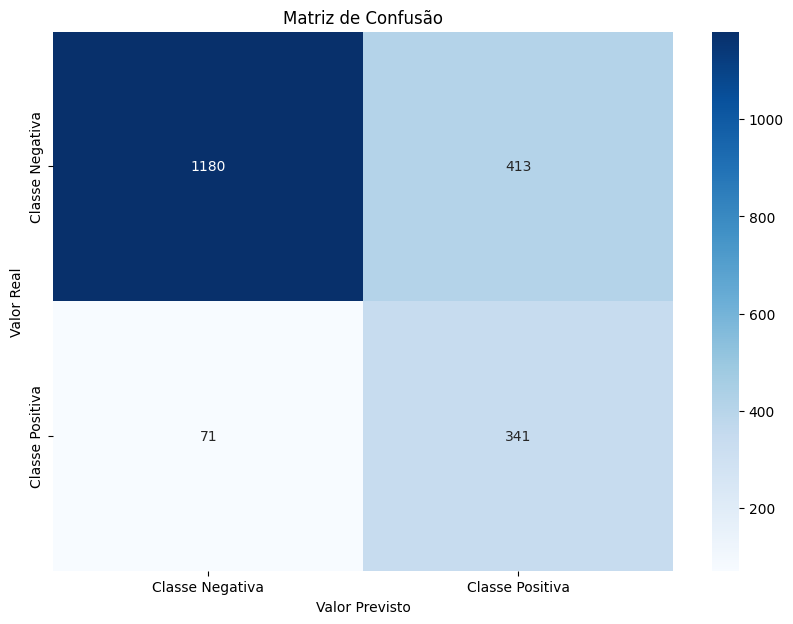

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.94      0.74      0.83      1593
    Classe 1       0.45      0.83      0.58       412

    accuracy                           0.76      2005
   macro avg       0.70      0.78      0.71      2005
weighted avg       0.84      0.76      0.78      2005



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=30):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

def create_resnet50_L():
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)
        model = Model(inputs=base_model.input, outputs=predictions)

        for layer in base_model.layers:
            layer.trainable = True
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model


melor fold = 1
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.7309 - loss: 7.7196 - val_accuracy: 0.7712 - val_loss: 1.7173 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7887 - loss: 1.3319 - val_accuracy: 0.7675 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7870 - loss: 0.7467 - val_accuracy: 0.7407 - val_loss: 0.7149 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7764 - loss: 0.7045 - val_accuracy: 0.7753 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7845 - loss: 0.6460 - val_accuracy: 0.8004 - val_loss: 0.6502 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7840 - loss: 0.6357 - val_accuracy: 0.7785 - val_loss: 0.6353 - learning_rate: 0.0010
Epoch 7/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accur

W0000 00:00:1721593909.723458     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7014732862965289
Recall : 0.7991653410856965
F1-Score : 0.7034645394200536
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.7285 - loss: 7.4982 - val_accuracy: 0.7780 - val_loss: 1.5630 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7813 - loss: 1.2597 - val_accuracy: 0.7935 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7899 - loss: 0.7330 - val_accuracy: 0.7985 - val_loss: 0.6638 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7866 - loss: 0.6669 - val_accuracy: 0.7753 - val_loss: 0.6151 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7893 - loss: 0.6358 - val_accuracy: 0.7511 - val_loss: 0.6701 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7917 - loss: 0.6390 - val_accuracy: 0.7785 - val_loss: 0.6162 - learning_r

W0000 00:00:1721594212.961581     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6898852976018954
Recall : 0.7891625375581275
F1-Score : 0.6749678573425009
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7242 - loss: 7.9079 - val_accuracy: 0.7899 - val_loss: 1.7956 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7821 - loss: 1.4084 - val_accuracy: 0.7744 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7843 - loss: 0.7502 - val_accuracy: 0.7748 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7751 - loss: 0.6869 - val_accuracy: 0.7835 - val_loss: 0.6610 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7872 - loss: 0.6502 - val_accuracy: 0.7671 - val_loss: 0.6299 - learning_rate: 0.0010
Epoch 6/30
548/549 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7911 - loss: 0.6282
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00

W0000 00:00:1721594418.152527     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6876453075417865
Recall : 0.7857937335064207
F1-Score : 0.6722875872872981
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.7358 - loss: 7.8601 - val_accuracy: 0.7698 - val_loss: 1.8006 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7874 - loss: 1.4214 - val_accuracy: 0.7830 - val_loss: 0.8253 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7921 - loss: 0.7764 - val_accuracy: 0.7575 - val_loss: 0.7162 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7875 - loss: 0.6731 - val_accuracy: 0.8004 - val_loss: 0.6166 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7812 - loss: 0.6578 - val_accuracy: 0.7758 - val_loss: 0.6185 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7806 - loss: 0.6421 - val_accuracy: 0.7876 - val_loss: 0.6182 - learning_rate:

W0000 00:00:1721594687.172034     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7042611894543225
Recall : 0.80456365531238
F1-Score : 0.7050288791016317
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7269 - loss: 7.7375 - val_accuracy: 0.7931 - val_loss: 1.7041 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7792 - loss: 1.3542 - val_accuracy: 0.7799 - val_loss: 0.7907 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7951 - loss: 0.7526 - val_accuracy: 0.7858 - val_loss: 0.6616 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7764 - loss: 0.6721 - val_accuracy: 0.7821 - val_loss: 0.6079 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7874 - loss: 0.6437 - val_accuracy: 0.7794 - val_loss: 0.6706 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7977 - loss: 0.6358
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010

W0000 00:00:1721594919.466656     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7132259148078541
Recall : 0.8056317383699315
F1-Score : 0.7254079812219347
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.7304 - loss: 7.7437 - val_accuracy: 0.7944 - val_loss: 1.7479 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7928 - loss: 1.3795 - val_accuracy: 0.8054 - val_loss: 0.7803 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7789 - loss: 0.7531 - val_accuracy: 0.7616 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7837 - loss: 0.6932 - val_accuracy: 0.7489 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7903 - loss: 0.6506 - val_accuracy: 0.7894 - val_loss: 0.6731 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7880 - loss: 0.6486 - val_accuracy: 0.7571 - val_loss: 0.6497 - learning_r

W0000 00:00:1721595179.178369     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7031526180649954
Recall : 0.8033081625314635
F1-Score : 0.7032226431502064
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7289 - loss: 7.6761 - val_accuracy: 0.7789 - val_loss: 1.6956 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7685 - loss: 1.3526 - val_accuracy: 0.7799 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7827 - loss: 0.7468 - val_accuracy: 0.7885 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7872 - loss: 0.6546 - val_accuracy: 0.7721 - val_loss: 0.6598 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7921 - loss: 0.6488 - val_accuracy: 0.7498 - val_loss: 0.6735 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7803 - loss: 0.6629 - val_accuracy: 0.7566 - val_loss: 0.6662 - learning_ra

W0000 00:00:1721595434.440841     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7143732597532385
Recall : 0.8118040699906752
F1-Score : 0.7239674593241552
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7170 - loss: 7.6628 - val_accuracy: 0.7917 - val_loss: 1.6557 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7886 - loss: 1.3195 - val_accuracy: 0.7780 - val_loss: 0.7920 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7994 - loss: 0.7242 - val_accuracy: 0.7826 - val_loss: 0.6850 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7856 - loss: 0.6738 - val_accuracy: 0.7721 - val_loss: 0.6523 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7804 - loss: 0.6533 - val_accuracy: 0.7644 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7858 - loss: 0.6439
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001

W0000 00:00:1721595666.845663     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6983277547793677
Recall : 0.7973864723700169
F1-Score : 0.6957756192884648
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7308 - loss: 7.8630 - val_accuracy: 0.7735 - val_loss: 1.7073 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7753 - loss: 1.3334 - val_accuracy: 0.7890 - val_loss: 0.7464 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7849 - loss: 0.7403 - val_accuracy: 0.7840 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7841 - loss: 0.6753 - val_accuracy: 0.7662 - val_loss: 0.6750 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7843 - loss: 0.6539 - val_accuracy: 0.7954 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 6/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7910 - loss: 0.6363 - val_accuracy: 0.7019 - val_loss: 0.7186 - learning_rate: 

W0000 00:00:1721595889.470560     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6980095792583245
Recall : 0.7945410442530733
F1-Score : 0.6988794236620987
Epoch 1/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.7314 - loss: 7.4993 - val_accuracy: 0.8036 - val_loss: 1.5533 - learning_rate: 0.0010
Epoch 2/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7785 - loss: 1.2656 - val_accuracy: 0.7876 - val_loss: 0.7552 - learning_rate: 0.0010
Epoch 3/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7873 - loss: 0.7378 - val_accuracy: 0.7748 - val_loss: 0.7030 - learning_rate: 0.0010
Epoch 4/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7827 - loss: 0.6755 - val_accuracy: 0.7780 - val_loss: 0.6608 - learning_rate: 0.0010
Epoch 5/30
549/549 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7808 - loss: 0.6482 - val_accuracy: 0.6996 - val_loss: 0.8368 - learning_rate: 0.0010
Epoch 6/30
548/549 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7837 - loss: 0.6454
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001

W0000 00:00:1721596166.334083     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.7161148656479895
Recall : 0.8125156174769471
F1-Score : 0.7271451421062223
Acurácia média: 0.7452867830423939 ± 0.02207741813967344
Precisão média: 0.7026469073206304 ± 0.00929039421950626
Recall médio: 0.8003872372454731 ± 0.008453168449946842
F1-Score médio: 0.7030147131904567 ± 0.018241007525310004


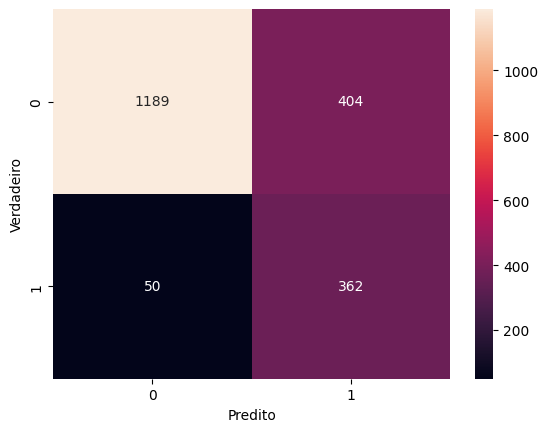

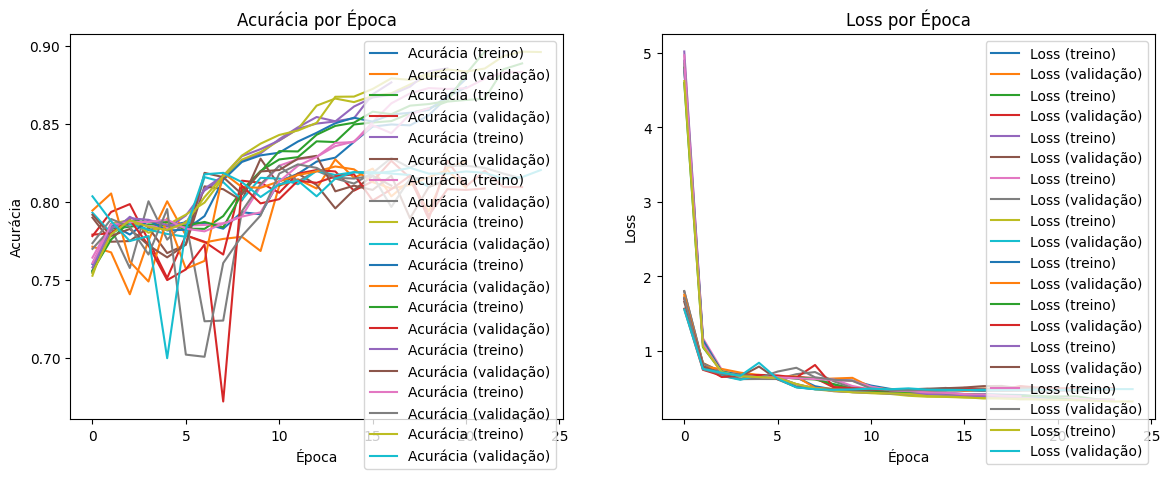

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    tf.keras.backend.clear_session()
    model = create_resnet50()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão : {precisao_classe_1}")
    print(f"Recall : {recall_classe_1}")
    print(f"F1-Score : {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
#model.save_weights('/kaggle/working/VGG-16.weights.h5')